In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("Online Purchase.csv")

In [6]:
df.head()

,Customer_ID,Gender,Age,Salary,Purchased
0,1,Male,35,500,0
1,2,Female,25,300000,1
2,3,Female,100,200000,0
3,15566689,Female,35,57000,0
4,15569641,Female,58,95000,1


In [7]:
df.shape

(403, 5)

In [8]:
df.info

<bound method DataFrame.info of      Customer_ID  Gender  Age  Salary  Purchased
0              1    Male   35     500          0
1              2  Female   25  300000          1
2              3  Female  100  200000          0
3       15566689  Female   35   57000          0
4       15569641  Female   58   95000          1
..           ...     ...  ...     ...        ...
398     15813113    Male   40  107000          1
399     15814004    Male   27   20000          0
400     15814553    Male   57   60000          1
401     15814816    Male   31   66000          0
402     15815236  Female   45  131000          1

[403 rows x 5 columns]>

In [9]:
df.describe()

,Customer_ID,Age,Salary,Purchased
count,4.030000e+02,403.000000,403.000000,403.000000
mean,1.557473e+07,37.771712,70465.260546,0.357320
std,1.352373e+06,10.915209,36598.127268,0.479806
min,1.000000e+00,18.000000,500.000000,0.000000
25%,1.562463e+07,29.500000,43000.000000,0.000000
50%,1.569326e+07,37.000000,70000.000000,0.000000
75%,1.575020e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,100.000000,300000.000000,1.000000


In [11]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

In [12]:
y=df['Purchased']

In [13]:
y

0      0
1      1
2      0
3      0
4      1
      ..
398    1
399    0
400    1
401    0
402    1
Name: Purchased, Length: 403, dtype: int64

In [15]:
y.shape

(403,)

In [16]:
X=df[["Age","Salary"]]

In [17]:
X

,Age,Salary
0,35,500
1,25,300000
2,100,200000
3,35,57000
4,58,95000
...,...,...
398,40,107000
399,27,20000
400,57,60000
401,31,66000


In [18]:
X.shape

(403, 2)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

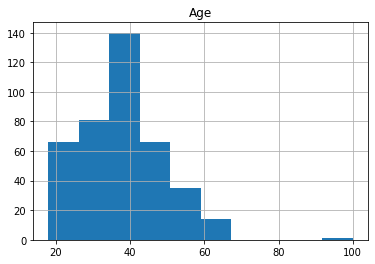

In [23]:
df[['Age']].hist()

<AxesSubplot:>

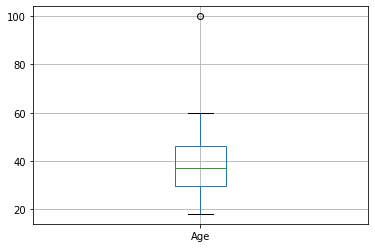

In [24]:
df[['Age']].boxplot()

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

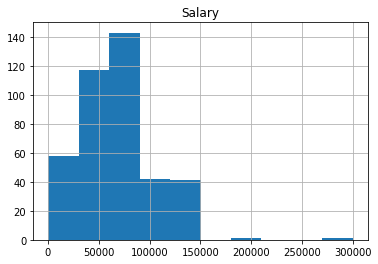

In [25]:
df[['Salary']].hist()

<AxesSubplot:>

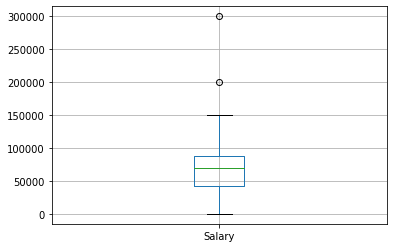

In [27]:
df[['Salary']].boxplot()

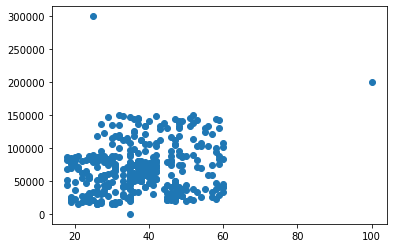

In [29]:
plt.scatter(df['Age'],df['Salary'])
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,mean_absolute_error,r2_score,confusion_matrix

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2539)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((282, 2), (121, 2), (282,), (121,))

In [34]:
ss=StandardScaler()

In [35]:
X_train_ss=ss.fit_transform(X_train)

In [61]:
X_train_ss

,Age,Salary
0,1.804167,-0.654817
1,0.982826,0.433204
2,-0.294815,-0.017927
3,0.526525,1.786596
4,-0.203555,-1.026336
...,...,...
277,0.344005,-0.177149
278,0.709046,0.194370
279,-0.294815,1.998892
280,1.895427,1.892744


In [36]:
X_test_ss=ss.fit_transform(X_test)

In [38]:
X_train_ss=pd.DataFrame(X_train_ss,columns=X_train.columns)
X_test_ss=pd.DataFrame(X_test_ss,columns=X_test.columns)

# reduce impact of outlier

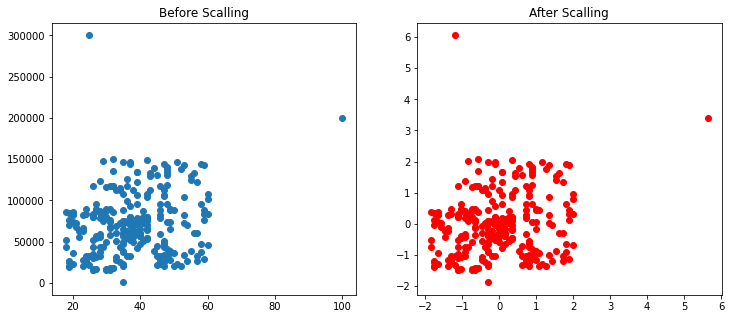

In [42]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['Salary'])
ax1.set_title("Before Scalling")
ax2.scatter(X_train_ss['Age'],X_train_ss['Salary'],color='red')
ax2.set_title('After Scalling')
plt.show()

# uniform sacle and distribution

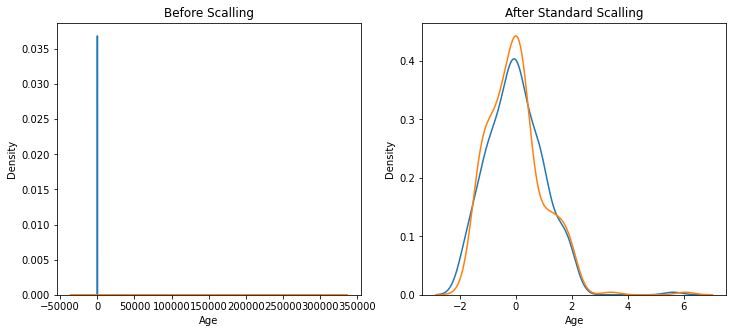

In [45]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before saclling
ax1.set_title('Before Scalling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['Salary'],ax=ax1)

#after scalling

ax2.set_title('After Standard Scalling')
sns.kdeplot(X_train_ss['Age'],ax=ax2)
sns.kdeplot(X_train_ss['Salary'],ax=ax2)
plt.show()

# Compare Distribution Before Scalling and After Scalling

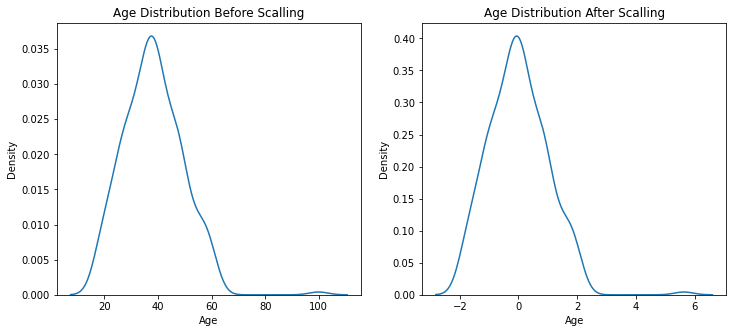

In [46]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before saclling
ax1.set_title('Age Distribution Before Scalling')
sns.kdeplot(X_train['Age'],ax=ax1)

#after scalling

ax2.set_title('Age Distribution After Scalling')
sns.kdeplot(X_train_ss['Age'],ax=ax2)
plt.show()

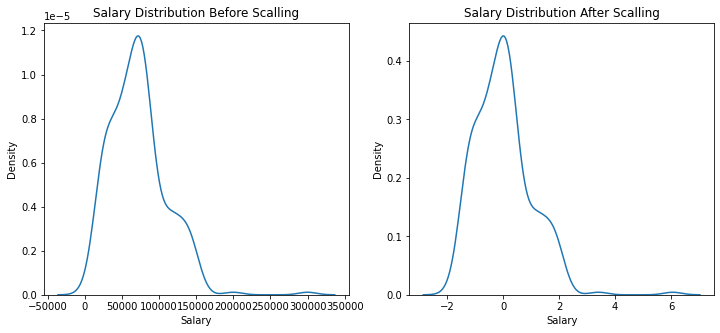

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before saclling
ax1.set_title('Salary Distribution Before Scalling')
sns.kdeplot(X_train['Salary'],ax=ax1)

#after scalling

ax2.set_title('Salary Distribution After Scalling')
sns.kdeplot(X_train_ss['Salary'],ax=ax2)
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr=LogisticRegression()

In [50]:
lr.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred=lr.predict(X_test)

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred)

0.6694214876033058

# After Scalling Accuracy is

In [56]:
lr.fit(X_train_ss,y_train)

LogisticRegression()

In [57]:
y_pred=lr.predict(X_test_ss)

In [58]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.8429752066115702